# Redes Neuronales Convolucionales (CNN)

Cargamos el conjunto de datos Fashion MNIST que trae la propia biblioteca de Keras:

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Visualicemos la primera imagen con su correspondiente etiqueta para comprobar que la carga de los datos ha tenido lugar con éxito:

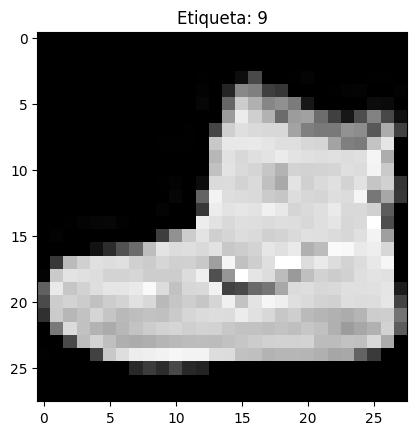

In [2]:
import matplotlib.pyplot as plt

indice_imagen = 0

plt.imshow(train_images[indice_imagen], cmap='gray')
plt.title(f'Etiqueta: {train_labels[indice_imagen]}')
plt.show()

In [3]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

Una vez hemos cargado los datos, veamos cómo los hemos almacenado:

In [4]:
train_images.shape

(60000, 28, 28)

Como podemos observar, tenemos $60000$ imágenes en el conjunto de entrenamiento, de modo que cada imagen se encuentra almacenada en forma de una matriz $28 x 28$. Veamos también cuántas observaciones tenemos en cada una de las $10$ clases:

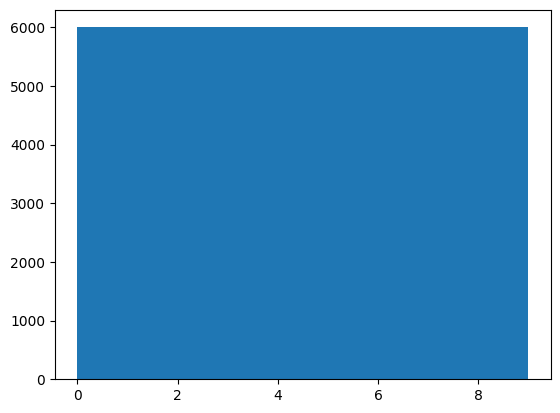

In [5]:
import numpy as np
import matplotlib.pyplot as plt

plt.hist(train_labels)
plt.show()

Podemos afirmar que nos encontramos ante un dataset equilibrado puesto que observamos que cada una de las diez clases tienen el mismo número de observaciones. Transformaremos las etiquetas en una matriz binaria de clases para poder emplearlas en el modelo:

In [17]:
from tensorflow import keras
from keras.utils import np_utils

class_num=np.unique(train_labels).size
y_train=np_utils.to_categorical(train_labels,class_num)
y_test=np_utils.to_categorical(test_labels,class_num)

In [18]:
y_train.shape

(60000, 10)

In [19]:
y_test.shape

(10000, 10)

Y aplicaremos un reescalado de lo datos para evitar problemas de inestabilidad numérica. Puesto que sabemos que los datos son provenientes de imágenes, sabemos que los valores de los arrays se mueven entre $0$ y $255$. Si dividimos los valores entre $255$, obtendremos valores que se mueven en el rango $[0,1]$:

In [20]:
X_train = train_images.astype('float32')
X_test = test_images.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

Una vez tenemos los datos tratados, podemos comenzar a entrenar una Red Neuronal Convolucional (CNN) que trate de resolver este problema de clasificación multiclase. En primer lugar, diseñamos la estructura de la red:

In [21]:
from keras import Sequential
from keras.layers import Flatten, Dropout, Dense, Conv2D, MaxPooling2D

model = keras.Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

Definimos la función de pérdida, el optimizador y la métrica que evaluará el rendimiento:

In [22]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Por último, definimos los epoch, el porcentaje de observaciones que queremos dejar para la validación y procedemos a entrenar el modelo:

In [23]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50)

Epoch 1/50
1500/1500 [==============================] - 12s 8ms/step - loss: 0.9737 - accuracy: 0.6351 - val_loss: 0.6258 - val_accuracy: 0.7670
Epoch 2/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.6836 - accuracy: 0.7483 - val_loss: 0.5571 - val_accuracy: 0.7975
Epoch 3/50
1500/1500 [==============================] - 11s 8ms/step - loss: 0.6290 - accuracy: 0.7713 - val_loss: 0.5146 - val_accuracy: 0.8125
Epoch 4/50
1500/1500 [==============================] - 11s 8ms/step - loss: 0.5917 - accuracy: 0.7846 - val_loss: 0.4981 - val_accuracy: 0.8180
Epoch 5/50
1500/1500 [==============================] - 11s 8ms/step - loss: 0.5600 - accuracy: 0.7959 - val_loss: 0.4529 - val_accuracy: 0.8317
Epoch 6/50
1500/1500 [==============================] - 11s 8ms/step - loss: 0.5394 - accuracy: 0.8012 - val_loss: 0.4383 - val_accuracy: 0.8376
Epoch 7/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.5219 - accuracy: 0.8086 - val_loss: 0.4287 - val_ac

Veamos cómo ha sido el proceso de aprendizaje de los parámetros del modelo y cómo ha sido su efecto en las diferentes pérdidas y exactitudes:

In [24]:
import pandas as pd

model_history = pd.DataFrame(history.history)
model_history['epoch'] = history.epoch

In [25]:
model_history.head()

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.973653,0.635125,0.625834,0.767000,0
1,0.683561,0.748292,0.557066,0.797500,1
2,0.629023,0.771312,0.514607,0.812500,2
3,0.591707,0.784563,0.498053,0.818000,3
4,0.560026,0.795896,0.452876,0.831667,4


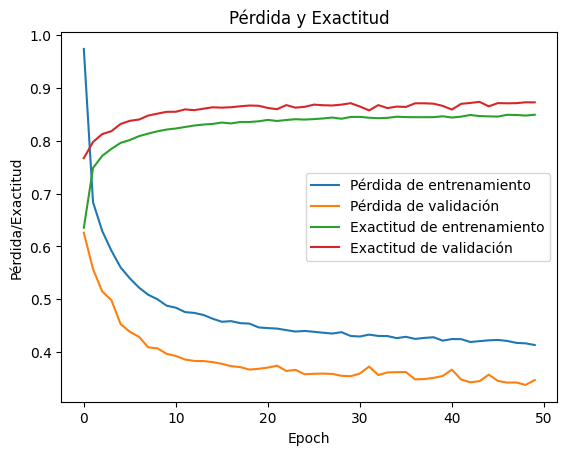

In [26]:
plt.figure()
plt.plot(model_history['epoch'], model_history['loss'], label='Pérdida de entrenamiento')
plt.plot(model_history['epoch'], model_history['val_loss'], label='Pérdida de validación')
plt.plot(model_history['epoch'], model_history['accuracy'], label='Exactitud de entrenamiento')
plt.plot(model_history['epoch'], model_history['val_accuracy'], label='Exactitud de validación')
plt.title('Pérdida y Exactitud')
plt.xlabel('Epoch')
plt.ylabel('Pérdida/Exactitud')
plt.legend()
plt.show()

Con el objetivo de evitar el *overfitting*, para entrenar el modelo final que realizará la predicción de los patrones del conjunto de test, lo configuraremos con $epoch=15$:

In [28]:
from keras import Sequential
from keras.layers import Flatten, Dropout, Dense, Conv2D, MaxPooling2D

model_final = keras.Sequential()
model_final.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model_final.add(MaxPooling2D((2, 2)))
model_final.add(Dropout(0.2))

model_final.add(Conv2D(16, (3, 3), activation='relu'))
model_final.add(MaxPooling2D((2, 2)))
model_final.add(Dropout(0.2))

model_final.add(Conv2D(32, (3, 3), activation='relu'))
model_final.add(MaxPooling2D((2, 2)))
model_final.add(Dropout(0.2))

model_final.add(Flatten())
model_final.add(Dense(64, activation='relu'))
model_final.add(Dropout(0.2))

model_final.add(Dense(10, activation='softmax'))

model_final.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_final = model_final.fit(X_train, y_train, validation_split=0.2, epochs=15)

scores = model_final.evaluate(X_test, y_test,  verbose=0)
print("Accuracy: ", (scores[1]))

Epoch 1/15
1500/1500 [==============================] - 12s 8ms/step - loss: 0.9818 - accuracy: 0.6323 - val_loss: 0.6314 - val_accuracy: 0.7626
Epoch 2/15
1500/1500 [==============================] - 11s 7ms/step - loss: 0.7047 - accuracy: 0.7375 - val_loss: 0.5620 - val_accuracy: 0.7839
Epoch 3/15
1500/1500 [==============================] - 11s 7ms/step - loss: 0.6458 - accuracy: 0.7589 - val_loss: 0.5288 - val_accuracy: 0.8095
Epoch 4/15
1500/1500 [==============================] - 11s 8ms/step - loss: 0.6081 - accuracy: 0.7756 - val_loss: 0.5190 - val_accuracy: 0.8002
Epoch 5/15
1500/1500 [==============================] - 11s 8ms/step - loss: 0.5827 - accuracy: 0.7865 - val_loss: 0.4762 - val_accuracy: 0.8224
Epoch 6/15
1500/1500 [==============================] - 11s 8ms/step - loss: 0.5630 - accuracy: 0.7935 - val_loss: 0.4693 - val_accuracy: 0.8249
Epoch 7/15
1500/1500 [==============================] - 11s 8ms/step - loss: 0.5421 - accuracy: 0.8010 - val_loss: 0.4406 - val_ac